In [1]:
import pandas as pd


df = pd.read_csv('mushrooms.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
missing_values = df.isnull().sum()

# Print out missing values per column
print(missing_values)
                     

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [11]:
class_counts = df["class"].value_counts()
print(class_counts)



class
e    4208
p    3916
Name: count, dtype: int64


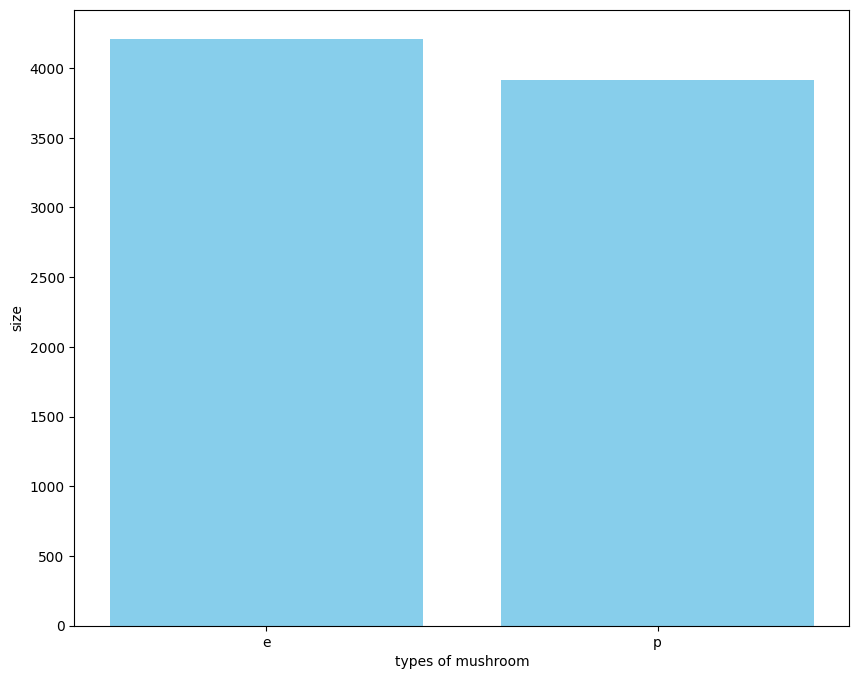

In [14]:
plt.figure(figsize=(10,8))
plt.bar(class_counts.index,class_counts,color='skyblue')
plt.xlabel("types of mushroom")
plt.ylabel("size")
plt.show()

In [25]:
d = df.head(1000)
X = d[['cap-shape','odor','gill-spacing']]
y = d['class']






In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

d_model = DecisionTreeClassifier()
d_model.fit(X_train,y_train)



predict = d_model.predict(X_test)

print("Accuracy =", accuracy_score(y_test, predict) * 100)





ValueError: could not convert string to float: 'f'

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("mushrooms.csv")

# Encode categorical data
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop("class", axis=1)
y = df["class"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
d_model = DecisionTreeClassifier()
d_model.fit(X_train, y_train)

# Predict
y_pred = d_model.predict(X_test)

# Accuracy
print("Accuracy =", round(accuracy_score(y_test, y_pred) * 100, 2), "%")





Accuracy = 100.0 %


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [6]:
y_pred = d_model.predict(df.head(1))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- class
